# Getting started
Figanos enables the creation of common climate data plots.



## Overview

Figanos is a dictionary-based function interface that wraps [Matplotlib](https://matplotlib.org/) and [Xarray](https://docs.xarray.dev/en/stable/) plotting functions to create common climate data plots. Its inputs are most commonly xarray DataArrays or Datasets, and it is best used when these arrays are the output of workflows incorporating [Xscen](https://github.com/Ouranosinc/xscen) and/or [Xclim](https://xclim.readthedocs.io/en/stable/). Style-wise, the plots follow the general guidelines offered by the [IPCC visual style guide 2022](https://www.ipcc.ch/site/assets/uploads/2022/09/IPCC_AR6_WGI_VisualStyleGuide_2022.pdf), but aim to create a look that could be distinctively associated with [Ouranos](https://www.ouranos.ca/en). The [Figanos Github repository](https://github.com/Ouranosinc/figanos) hosts the files needed to install the package, as well as the dependencies and requirements.

Figanos currently includes the following functions:

1. **timeseries()**: Creates time series as line plots.
2. **gridmap()**: Plots gridded georeferenced data on a map.
3. **hatchmap()**: Plots hatched areas on a map.
4. **scattermap()**: Make a scatter plot of georeferenced data on a map.
5. **gdfmap()**: Plots geometries (through a GeoDataFrame) on a map.
6. **stripes()**: Create climate stripe diagrams.
7. **violin()**: Create seaborn violin plots with extra options.
8. **heatmap()**: Create seaborn heatmaps with extra options.
9. **taylordiagram()**: Create Taylor diagram.

The following features are also included in the package:

* Automatically recognizes some common data structures (e.g. climate ensembles) using variable and coordinate names and creates the appropriate plots.
* Automatically links attributes from xarray objects to plot elements (title, axes), with customization options.
* Automatically assigns colors to some common variables and, following the IPCC visual guidelines.
* Provides options to visually enhance the plots, and includes a default style to ensure coherence when creating multiple plots.
* Returns a [matplotlib axes object](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.html#matplotlib.axes.Axes) that is fully customizeable through matplotlib functions and methods.


## Preparing the data

Figanos only accepts [xarray DataArrays or Datasets](https://docs.xarray.dev/en/stable/user-guide/data-structures.html) as data inputs. As a general rule, figanos functions will not accomplish any data processing or cleaning tasks - the object(s) passed to the functions should therefore only contain the data that will appear on the graph and the metadata that supports it.

To create, for instance, a time series plot from a NetCDF file, the following preparation steps have to be taken:

In [1]:
%load_ext autoreload
%autoreload 2

# import necessary libraries
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cartopy.crs as ccrs
import xclim as xc
from xclim import sdba

import figanos.matplotlib as fg
from figanos import Logos

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/exec/jlavoie/.conda/figanos/lib/python3.9/site-packages/xclim/indices/fire/_cffwis.py:207: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _day_length(lat: int | float, mth: int):  # pragma: no cover
/exec/jlavoie/.conda/figanos/lib/python3.9/site-packages/xclim/indices/fire/_cffwis.py:227: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _day_length_factor(

In [2]:
# create xarray object from a NetCDF
url = 'https://pavics.ouranos.ca//twitcher/ows/proxy/thredds/dodsC/birdhouse/disk2/cccs_portal/indices/Final/BCCAQv2_CMIP6/tx_max/YS/ssp585/ensemble_percentiles/tx_max_ann_BCCAQ2v2+ANUSPLIN300_historical+ssp585_1950-2100_30ymean_percentiles.nc'
opened = xr.open_dataset(url, decode_timedelta=False)

# select a location
ds_time = opened.isel(lon=500, lat=250)
# select only the variables containing the data to be plotted
ds_time = ds_time[['tx_max_p50', 'tx_max_p10', 'tx_max_p90']]

ds_time

<xarray.Dataset>
Dimensions:     (time: 13)
Coordinates:
    horizon     (time) |S64 ...
    lat         float64 61.87
    lon         float64 -99.29
  * time        (time) datetime64[ns] 1951-01-01 1961-01-01 ... 2071-01-01
Data variables:
    tx_max_p50  (time) float32 ...
    tx_max_p10  (time) float32 ...
    tx_max_p90  (time) float32 ...
Attributes: (12/28)
    ccdp_name:               tx_max
    description:             30 year mean Annual minimum of daily maximum tem...
    history:                 [2022-04-28 05:01:36] : Computation of the perce...
    long_name:               30 year mean Maximum daily maximum temperature
    standard_name:           air_temperature
    units:                   degC
    ...                      ...
    target_dataset:          ANUSPLIN interpolated Canada daily 300 arc secon...
    target_dataset_id:       ANUSPLIN300
    target_institute_id:     CFS-NRCan
    target_institution:      Canadian Forest Service, Natural Resources Canada
    target_references:       McKenney, D.W., Hutchinson, M.F., Papadopol, P.,...
    target_version:          obtained: 2 April 2012, 14 June 2012, and 30 Jan...

## Using the Ouranos stylesheet

Most parameters affecting the style of plots can be set through matplotlib stylesheets. Figanos includes custom stylesheets that can be accessed through the set_mpl_style() function. Paths to your own stylesheets ('.mplstyle' extension) can also be passed to this function. To use the built-in matplotlib styles, use `mpl.style.use()`.

The currently available stylesheets are as follows:

* ouranos: General stylesheet, including default colors.

In [3]:
# use ouranos style
fg.utils.set_mpl_style('ouranos')

#setup notebook
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

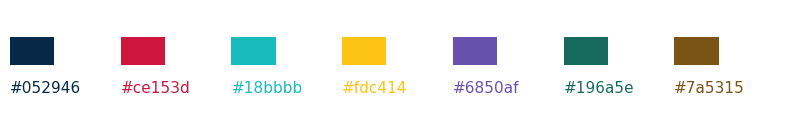

In [4]:
#display the cycler colors
from matplotlib.patches import Rectangle

style_colors = matplotlib.rcParams["axes.prop_cycle"].by_key()["color"]

fig, ax = plt.subplots(figsize=(10,3))
for color, x in zip(style_colors, np.arange(0, len(style_colors)*2, 2)):
    ax.add_patch(
    Rectangle(xy=(x, 1),width=0.8,height=0.5,
              facecolor=color)
    )
    ax.text(x, 0.5, str(color), color=color)

ax.set_ylim(0,2)
ax.set_xlim(0,14)
ax.set_aspect('equal')
ax.set_axis_off()

## Timeseries

The [**timeseries()**](#timeseries) function accepts DataArrays or Datasets. When only one object is passed to the function, using a dictionary is optional. Selecting one of the variables from our Dataset creates a DataArray (one line).

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

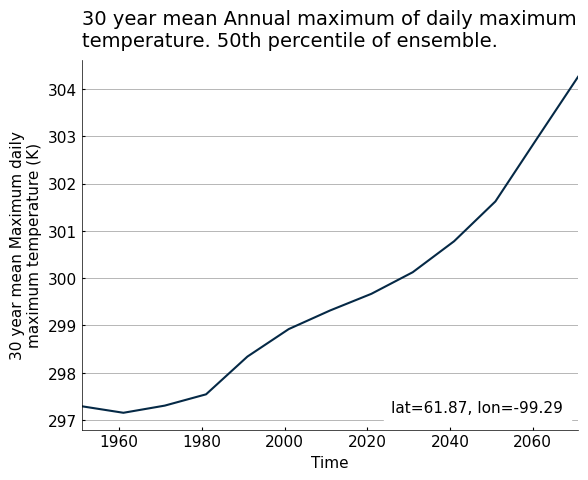

In [5]:
fg.timeseries(ds_time.tx_max_p50)

### Using the dictionary interface


The main elements of a plot are dependent on four arguments, each accepting dictionaries:

1. `data` : a dictionary containing the Xarray objects and their respective keys, used as labels on the plot.
2. `use_attrs`: a dictionary linking attributes from the Xarray object to plot text elements.
3. `fig_kw`: a dictionary to pass arguments to the `plt.figure()` instance.
4. `plot_kw` : a dictionary using the same keys as `data` to pass arguments to the underlying plotting function, in this case [matplotlib.axes.Axes.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html).

When labels are passed in `data`, any 'label' argument passed in `plot_kw` will be ignored.

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='air_temperature (K)'>

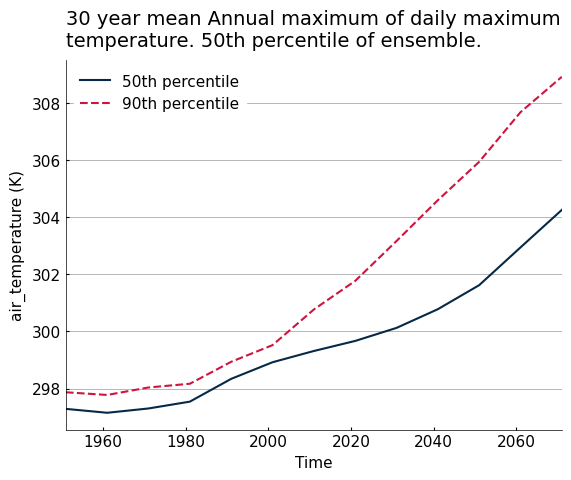

In [6]:
my_data = {'50th percentile': ds_time.tx_max_p50, '90th percentile': ds_time.tx_max_p90}
my_attrs = {'ylabel': 'standard_name'} # will look for an attribute 'standard name' in the first entry of my_data
plot_kws = {'90th percentile': {'linestyle': '--'}}

fg.timeseries(my_data,
              use_attrs = my_attrs,
              plot_kw = plot_kws,
              show_lat_lon=False
             )

### Customizing plots

Plots created with Figanos can be customized in two different ways:

1. By using the built-in options through arguments (e.g. changing the type of legend with the `legend` arg).
2. By creating a Matplotlib Axes class and using its methods (e.g. setting a new title with `ax.set_title()`).

Both of these types of customization are demonstrated below. In some cases, both methods can achieve the same result.

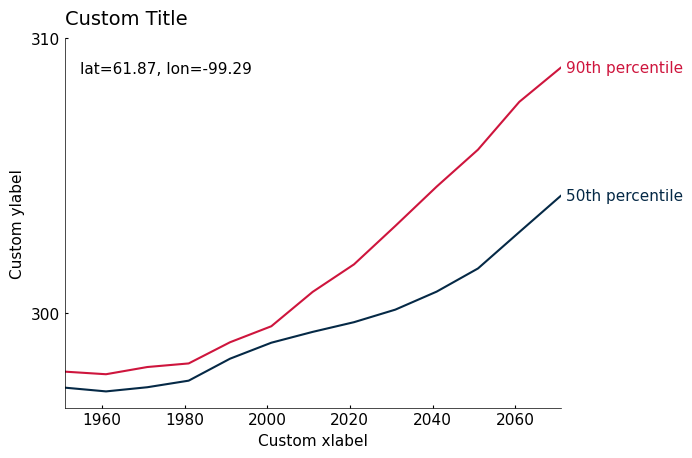

In [7]:
ax = fg.timeseries(my_data, show_lat_lon="upper left", legend='edge') # fun legend option, moved latitude and longitude tag
ax.set_title('Custom Title', loc='left') #when the title is left aligned, the "loc=left" argument must be used.
                                         # to remove a title, use ax.set_title('')
ax.set_xlabel('Custom xlabel')
ax.set_ylabel('Custom ylabel')
ax.grid(False) # removing the gridlines
ax.set_yticks([300,310]) # Custom yticks

#### Logos

Logos can also be added to plots if desired using the `fignos.utils.plot_logo()` function. This function requires that logos are passed as `pathlib.Path` objects or installed and called by their name (as `str`).

Figanos offers the `Logos()` convenience class for setup and management of logos so that they can be reused as needed. `Logos` can be used to set default logos as well as install custom logos, if desired. Logo files are saved to the user's config folder so that they can be reused.

By default, the `figanos_logo.png` is installed on initialization, while the Ouranos set of logos can be installed if desired.

For more information on logos, see the [Logos](../usage.rst#logo-management) documentation.

In [8]:
# Installing the default logos
l = Logos()
print(f"Default logo is found at: {l.default}.")

# Installing the Ouranos logos
l.install_ouranos_logos(permitted=True)

# Show all installed logos
l.installed()

Default logo is found at: /home/jlavoie/.config/figanos/logos/ouranos_logo_horizontal_couleur.svg.
Ouranos logos installed at: /home/jlavoie/.config/figanos/logos.


['default',
 'my_custom_logo',
 'ouranos_logo_horizontal_blanc',
 'ouranos_logo_horizontal_couleur',
 'ouranos_logo_horizontal_noir',
 'ouranos_logo_vertical_blanc',
 'ouranos_logo_vertical_couleur',
 'ouranos_logo_vertical_noir']

In [9]:
# To set a new default logo we can simply use an existing entry
l.set_logo(l.ouranos_logo_horizontal_couleur, "default")
print(f"Default logo is found at: {l.default}")
l.set_logo(l.ouranos_logo_vertical_couleur, "my_custom_logo")
print(f"my_custom_logo installed at: {l.my_custom_logo}.")

# Show all installed logos
l.installed()

Default logo is found at: /home/jlavoie/.config/figanos/logos/ouranos_logo_horizontal_couleur.svg
my_custom_logo installed at: /home/jlavoie/.config/figanos/logos/ouranos_logo_vertical_couleur.png.


['default',
 'my_custom_logo',
 'ouranos_logo_horizontal_blanc',
 'ouranos_logo_horizontal_couleur',
 'ouranos_logo_horizontal_noir',
 'ouranos_logo_vertical_blanc',
 'ouranos_logo_vertical_couleur',
 'ouranos_logo_vertical_noir']

The required arguments for `fignos.utils.plot_logo()` are a matplotlib axis (`ax`), a location (`loc`) string describing the position of the logo (ex: 'lower left', 'upper right', 'center').

The `logo` argument is optional but will accept either a fixed location on disk (as `pathlib.Path`) or a `str` that is mapped to an already-installed logo (e.g. 'my_custom_logo'; If not set, the 'default' logo will be used).

Either the `height` or `width` arguments can be used to resize the logo; If both are provided, only one will be used to resize the logo. This behaviour will change if `keep_ratio=False` is passed.

The function can also accept keyword arguments that are passed directly to `matplotlib.offsetbox.OffsetImage()`, such as `alpha` (transparency).

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

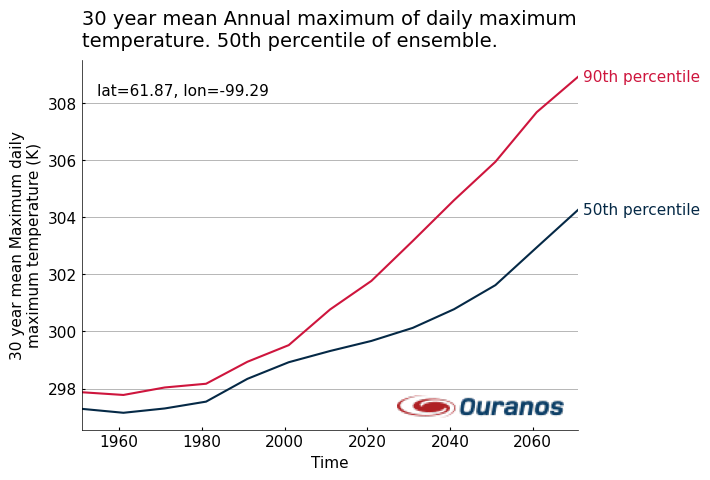

In [12]:
ax = fg.timeseries(my_data, show_lat_lon="upper left", legend='edge')

# Plotting with the default logo
# fg.utils.plot_logo(ax, loc='lower right', alpha=0.8, width=120)

# Plotting with a custom logo, resized with pixels
fg.utils.plot_logo(
    ax, 
    logo="my_custom_logo",
    loc='lower right',
    width=100,
    alpha=0.8,
)

#### Translation
Figanos can automatically use translated version of the attributes to populate the plot. It also knows a few translations of usual terms, for the moment only in French.

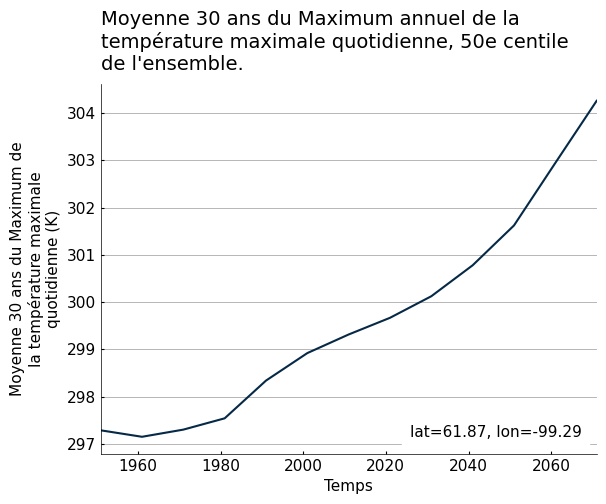

In [11]:
# Populate the example data with french attributes
ds_time.tx_max_p50.attrs.update(
    description_fr="Moyenne 30 ans du Maximum annuel de la température maximale quotidienne, 50e centile de l'ensemble.",
    long_name_fr="Moyenne 30 ans du Maximum de la température maximale quotidienne"
)
with xc.set_options(metadata_locales=['fr']):
    fg.timeseries(ds_time.tx_max_p50)

### Line plots with Datasets

When Datasets are passed to the timeseries function, certain names and data configurations will be recognized and will result in certain kinds of plots.

| Dataset configuration | Resulting plot | Notes |
|:----------:|:--------------:|:----------------:|
|Variables contain a substring of the format "\_pNN", where N are numbers|Shaded line graph with the central line being the middle percentile|
|Contains a dimension named "percentiles"|Shaded line graph with the central line being the middle percentile| Behaviour is shared with DataArrays containing the same dimension.|
|Variables contain "min" and "max" and "mean" (can be capitalized) |Shaded line graph with the central line being the mean|
|Contains a dimension named "realization"|Line graph with one line per realization | When plot_kw is specified, all realizations within the Dataset will share one style.  Behaviour is shared with DataArrays containing the same dimension.|
|Any other Dataset| Line graph with one line per variable||



<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

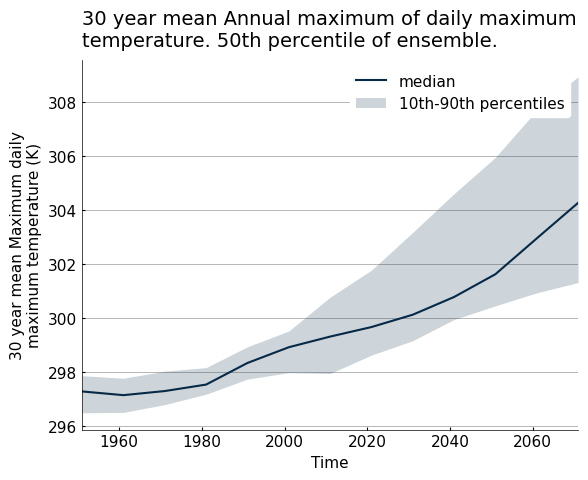

In [12]:
# Using 'median' as a key to make it the line label in the legend.
# legend='full' will create a legend entry for the shaded area
fg.plot.timeseries({'median': ds_time}, legend='full', show_lat_lon=False)

Whenever multiple lines are plotted from a single Dataset, their legend label will be the concatenation of the Dataset name (its key in the `data` arg.) and the name of the variables or coordinates from which the data is taken, unless the Dataset is passed to the function without a dictionary. When all lines from a Dataset have the same appearance, only the Dataset label will be shown.

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

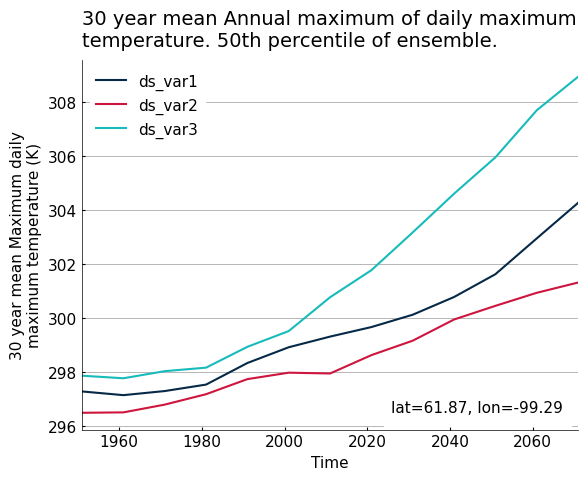

In [13]:
#Create a Dataset with different names as to not trigger the shaded line plot
ds_mod = ds_time.copy()
ds_mod = ds_mod.rename({'tx_max_p50': 'var1','tx_max_p10': 'var2','tx_max_p90': 'var3'})

fg.timeseries({'ds':ds_mod}, show_lat_lon=True)

### Keyword - color association

Following the IPCC visual style guidelines and the practices of many other climate organizations, some scenarios (RCPs, SSPs), models and projects (CMIPs) are associated with specific colors. These colors can be implemented in timeseries() through the keys of the `data` argument. If a formulation of such scenarios or model names is found in a key, the corresponding line will be given the appropriate color. For scenarios, alternative formats such as _ssp585_ or _rcp45_ are also accepted instead of the more formal _SSP5-8.5_ on _RCP4.5_. Model names do not currently have this flexibility. If multiple matching substrings exist, the following order of priority will dictate which color is used:

1. SSP scenarios
2. RCP scenarios
3. Model names
4. CMIP5 or CMIP6

A list of the accepted substrings and colors is shown below.

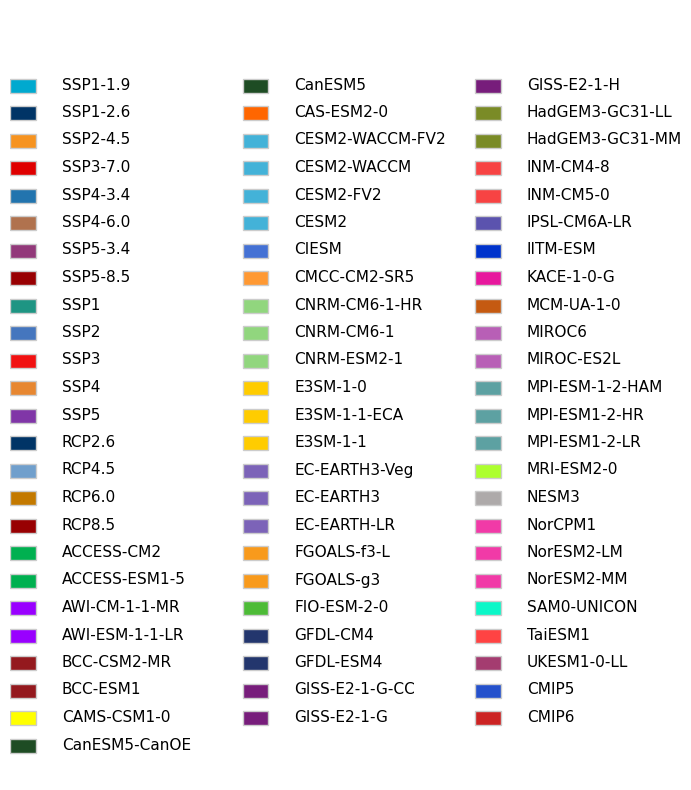

In [ ]:
from matplotlib.patches import Rectangle

color_dict = fg.utils.categorical_colors()

keys = np.array(list(color_dict.keys()))
keys = np.array_split(keys, 3)


fig, ax = plt.subplots(figsize=(8,10))
ax.set_ylim(-25,3)
ax.set_xlim(0,12)
ax.set_axis_off()
for colorlist, x in zip(keys, [1, 5.5, 10]):
    for y in np.arange(len(colorlist)):
        ax.text(x, -y, colorlist[y],
                va='bottom', ha='left',
                backgroundcolor='white',
                weight='normal', color='k'
                )
        ax.add_patch(
            Rectangle(xy=(x-1, -y),width=0.5,height=0.5,
                      facecolor=color_dict[colorlist[y]],
                     edgecolor='0.8')
                     )

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, xlabel='Time', ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

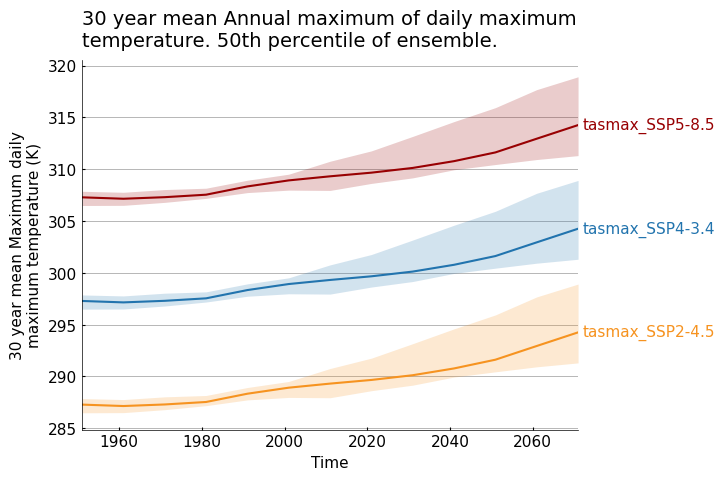

In [15]:
#creating fake scenarios
data = {'tasmax_ssp434': ds_time,
        'tasmax_ssp245': ds_time.copy()-10,
        'tasmax_ssp585': ds_time.copy()+10}

fg.timeseries(data=data, legend='edge', show_lat_lon=False)


## Gridded Data on Maps

The [gridmap](#gridmap) function plots gridded data onto maps built using [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) along with xarray plotting functions. The main arguments of the timeseries() functions are also found in gridmap(), but new ones are introduced to handle map projections and colormap/colorbar options.

By default, the Lambert Conformal conic projection is used for the basemaps. The projection can be changed using the `projection` argument. The available projections [can be found here](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections). The `transform` argument should be used to specify the data coordinate system. If a transform is not provided, figanos will look for dimensions named 'lat' and 'lon' or 'rlat' and 'rlon' and return the `ccrs.PlateCaree()` or `ccrs.RotatedPole()` transforms, respectively.

Features can also be added to the map by passing the names of the [cartopy pre-defined features](https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html) in a list via the `features` argument (case-insensitively). A nested dictionary can also be passed to `features` in order to apply modifiers to these features, for instance `features = {'coastline': {'scale': '50m', 'color':'grey'}}`.

The gridmap() function only accepts one object in its `data` argument, inside a dictionary or not. Datasets are accepted, but only their first variable will be plotted.

<GeoAxes: title={'center': '30 year mean Annual maximum\nof daily maximum temperature.\n50th percentile of ensemble.'}, xlabel='lon [degrees_east]', ylabel='lat [degrees_north]'>

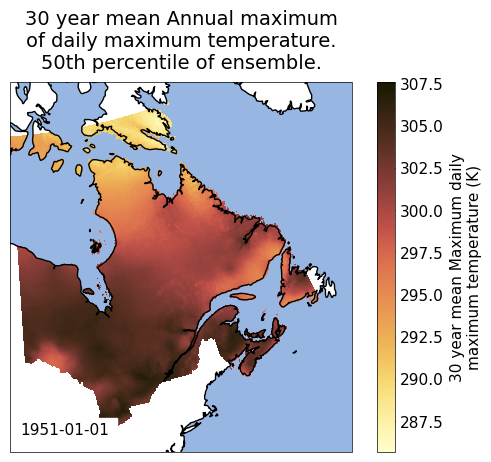

In [16]:
#Selecting a time and slicing our starting Dataset
ds_space = opened[['tx_max_p50']].isel(time=0).sel(lat=slice(40,65), lon=slice(-90,-55))

# defining our projection.
projection = ccrs.LambertConformal()

fg.gridmap(ds_space, projection = projection, features = ['coastline','ocean'], frame = True, show_time = 'lower left')

### Colormaps and colorbars

The colormap used to display the plots with gridmap() is directly dependent on three arguments:

* `cmap` accepts colormap objects or strings.

* `divergent` dictates whether or not the colormap will be sequential or divergent. If a number (integer of float) is provided, it becomes the center of the colormap. The default central value is 0.

* `levels=N` will create a discrete colormap of N levels. Otherwise, the colormap will be continuous.

 By default ( if `cmap=None`), figanos will look for certain variable names in the attributes of the DataArray (`da.name` and `da.history`, in this order) and return a colormap corresponding to the 'group' of this variable, following the [IPCC visual style guide's scheme](https://www.ipcc.ch/site/assets/uploads/2022/09/IPCC_AR6_WGI_VisualStyleGuide_2022.pdf) (see page 11). The groups are displayed in the table below.

|Variable Group|Matching strings|
|:------------:|:--------------:|
| Temperature (temp)        | _tas, tasmin, tasmax, tdps, tg, tn, tx_|
|Precipitation (prec)        |_pr, prc, hurs, huss, rain,<br>precip, precipitation, humidity, evapotranspiration_|
|Wind (wind)        |_sfcWind, ua, uas, vas_|
|Cryosphere (cryo)        |_snw, snd, prsn, siconc, ice_|

Note: The strings shown above will not be recognized as variables if they are part of a longer word, for example 'tas' in 'fantastic'.

The colormaps are built from RGB data be found in the [IPCC-WG1 Github repository](https://github.com/IPCC-WG1/colormaps). When none of the variables names match a group, or when multiple matches are found, the function resorts to the ['Batlow' colormap](https://www.fabiocrameri.ch/batlow/).

Strings passed to these arguments can either be names of matplotlib colormaps or names of the IPCC-prescribed colormaps, such as 'temp_div'(divergent colormap for temperature variables) or 'prec_seq.txt' (sequential colormap for precipitation-related variables). Any colormap specified as a string can be reversed by adding '_r' to the end of the string.


Text(0.5, 1.0, "This is still temperature data,\nbut let's pretend.")

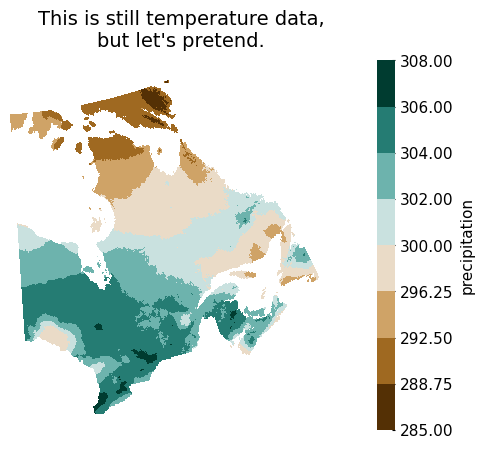

In [17]:
#change the name of our DataArray for one that inclues 'pr' (precipitation) - this is still the same temperature data
da_pr = ds_space.tx_max_p50.copy()
da_pr.name = 'pr_max_p50'

#diverging colormap with 8 levels, centered at 300
ax = fg.gridmap(da_pr, projection=projection, divergent=300, levels=8, plot_kw={'cbar_kwargs':{'label':'precipitation'}})
ax.set_title('This is still temperature data,\nbut let\'s pretend.')

**Note**: Using the `levels` argument will result in a colormap that is split evenly across the span of the data, without consideration for how 'nice' the intervals are (i.e. the boundaries of the different colors will often fall on numbers with some decimals, that might be totally significant to an audience). To obtain 'nice' intervals, it is possible to use the `levels` argument in `plot_kw`. This might however, and often, result in the number of levels not being exactly the one that is specified. Using both arguments is not recommended.

Text(0.5, 1.0, "This cmap has 6 levels instead of 8,\nbut aren't they nice?")

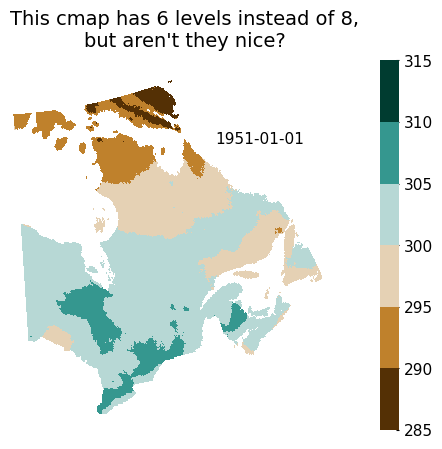

In [18]:
#creating the same map, with 'nice' levels.
ax = fg.gridmap(da_pr, projection=projection, divergent=300,
                plot_kw={'levels':8, 'cbar_kwargs':{'label':None}}, show_time=(0.85, 0.8))
ax.set_title('This cmap has 6 levels instead of 8,\nbut aren\'t they nice?')

It is also possible to specify your own levels by passing a list to `plot_kw['levels'].

<GeoAxes: title={'center': 'Custom levels'}, xlabel='lon [degrees_east]', ylabel='lat [degrees_north]'>

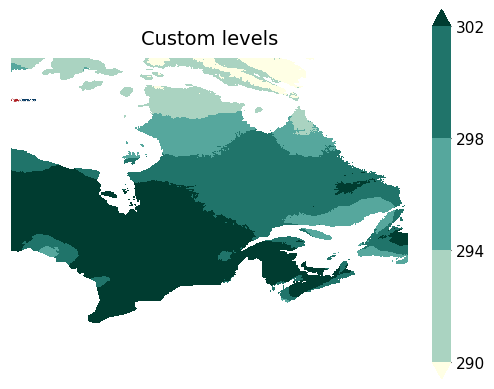

In [19]:
ax = fg.plot.gridmap(da_pr, plot_kw={'levels':[290,294,298,302], 'cbar_kwargs':{'label':None}})
ax.set_title('Custom levels')
fg.utils.plot_logo(ax, loc=(0, 0.85), **{'zoom': 0.08})

Text(0.5, 1.0, 'Custom cmap')

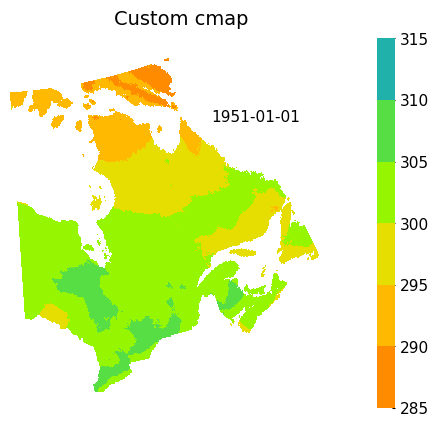

In [20]:
#Creating custom cmap (refer to https://matplotlib.org/stable/tutorials/colors/colormap-manipulation.html#directly-creating-a-segmented-colormap-from-a-list)
from matplotlib.colors import LinearSegmentedColormap
custom_colors =["darkorange", "gold", "lawngreen", "lightseagreen"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", custom_colors)
ax = fg.gridmap(da_pr, projection=projection, divergent=300, cmap=custom_cmap,
                plot_kw={'levels':8, 'cbar_kwargs':{'label':None}}, show_time=(0.85, 0.8))
ax.set_title('Custom cmap')

### pcolormesh vs contourf

By default, xarray plots two-dimensional DataArrays using the matplotlib pcolormesh function (see [xarray.plot.pcolormesh](https://docs.xarray.dev/en/stable/generated/xarray.plot.pcolormesh.html#xarray.plot.pcolormesh)). The `contourf` argument in gridmap allows the user to use [xarray.plot.contourf](https://docs.xarray.dev/en/stable/generated/xarray.plot.contourf.html?highlight=xarray.plot.contourf) function instead. This also implies the key-value pairs passed in `plot_kw` are passed to these functions.

At a large scales, both of these functions create practically equivalent plots. However, their inner workings are inheritely different, and these different ways of plotting data become apparent at small scales.

When using contourf, passing a value in `levels` is equivalent to passing it in `plot_kw['levels']`, meaning the number of levels on the plot might not be exactly the specified value.

Text(0.5, 1.0, 'contourf')

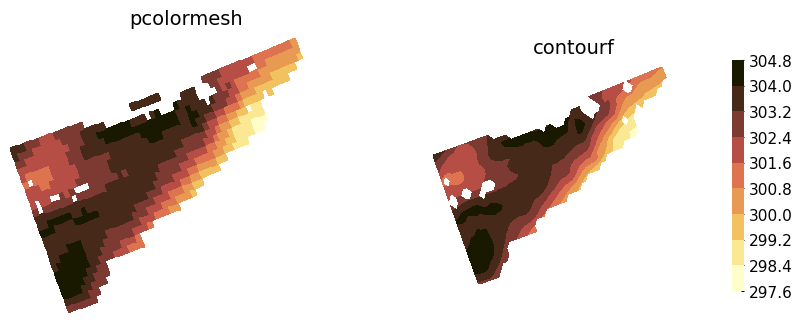

In [21]:
zoomed = ds_space['tx_max_p50'].sel(lat=slice(44,46), lon=slice(-65,-60))

fig, axs = plt.subplots(1,2, figsize=(10,6), subplot_kw= {'projection': ccrs.LambertConformal()})
fg.gridmap(ax = axs[0], data=zoomed, contourf=False,plot_kw={'levels':10, 'add_colorbar':False})
axs[0].set_title('pcolormesh')
fg.gridmap(ax = axs[1],data=zoomed, contourf=True, plot_kw={'levels':10, 'cbar_kwargs':{'shrink':0.5, 'label':None}})
axs[1].set_title('contourf')

## Station Data on Maps

Data that is georeferenced by coordinates (e.g. latitude and longitude) but is not on a grid can be plotted using the [scattermap](#gridmap) function. This function is practically identical to `gridmap()`, but introduces some new arguments (see examples below). The function essentially builds a basemap using cartopy and calls `plt.scatter()` to plot the data.

/home/jlavoie/Projets/figanos/figanos/matplotlib/utils.py:220: UserWarning: Attribute "description" not found.
  warnings.warn(f'Attribute "{string}" not found.')


(43.0, 50.0)

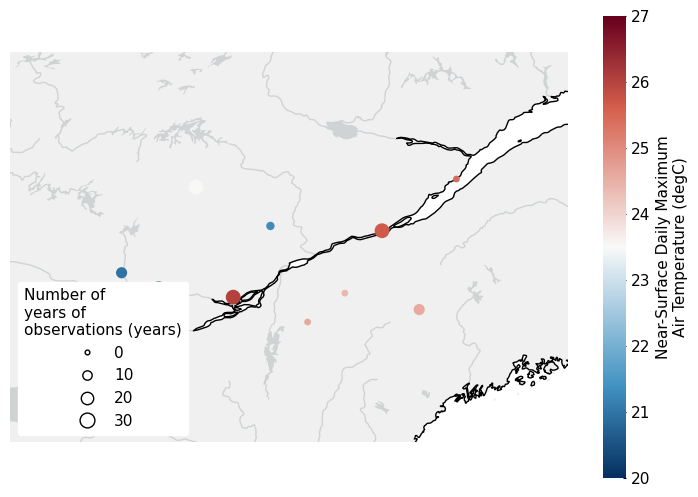

In [22]:
# create a fictional observational dataset from scratch
names = ['station_' + str(i) for i in np.arange(10)]
lat = 45 + np.random.rand(10)*3
lon = np.linspace(-76,-70, 10)
tas = 20 + np.random.rand(10)*7
yrs = (30 * np.random.rand(10)).astype(int)
attrs = {'units': 'degC', 'standard_name': 'air_temperature', 'long_name': 'Near-Surface Daily Maximum Air Temperature'}

tas = xr.DataArray(data=tas,
                        coords={'station': names, 'lat':('station', lat), 'lon': ('station', lon)},
                        dims=['station'],
                        attrs=attrs)
years = tas.copy().assign_attrs({'long_name': "Number of years of observations", 'units': 'years'})

years.data = yrs

obs = xr.Dataset({'tas': tas, 'years': years})

#set nice features
features = {"land": {"color": "#f0f0f0"},
            "rivers": {"edgecolor": "#cfd3d4"},
            "lakes": {"facecolor": "#cfd3d4"},
            "coastline": {"edgecolor": "black"},
}

# plot
ax =fg.scattermap(obs,
                  transform=ccrs.PlateCarree(),
                  sizes='years',
                  size_range=(15, 100),
                  divergent=23.5,
                  features=features,
                  fig_kw={'figsize': (9,6)},
                  legend_kw={'loc': 'lower left'},
                 )
ax.set_xlim(-78,-68)
ax.set_ylim(43,50)


It is possible to plot observations on top of gridded data by calling both `gridmap()` and `scattermap()` and fixing the colormap limits (`vmin` and `vmax`), like demonstrated below.

/home/jlavoie/Projets/figanos/figanos/matplotlib/utils.py:220: UserWarning: Attribute "description" not found.
  warnings.warn(f'Attribute "{string}" not found.')


<GeoAxes: xlabel='lon [degrees_east]', ylabel='lat [degrees_north]'>

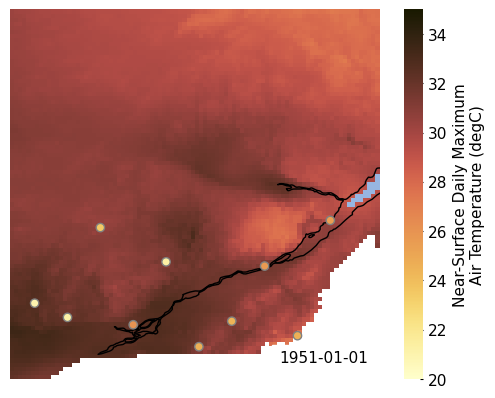

In [23]:
# defining our limits
vmin= 20
vmax= 35

# plotting the gridded data
ax = fg.gridmap(ds_space-273.15,
                plot_kw={'vmin': vmin, 'vmax': vmax, 'add_colorbar': False},
                features=['coastline','ocean'],
                show_time='lower right'
               )
ax.set_extent([-76.5, -69, 44.5, 52], crs=ccrs.PlateCarree()) # equivalent to set_xlim and set_ylim for projections

# plotting the observations
fg.scattermap(obs,
              ax=ax,
              transform=ccrs.PlateCarree(),
              plot_kw={'vmin': vmin, 'vmax': vmax, 'edgecolors':'grey'}
             )

## Plotting hatched areas
The [hatchmap](#hatchmap) function plots hatches on top of a map. It is a thin wrap around the [plt.contourf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) function, with very similar functionality to `gridmap()` and similar data arguments to `timeseries()`. It can be overlayed on top of a map created with `gridmap()` as shown below. [hatchmap](#hatchmap) can also be used with [plt.contourf()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) levels in plot_kw.

/home/jlavoie/Projets/figanos/figanos/matplotlib/utils.py:825: UserWarning: Colormap warning: More than one variable group found. Use the cmap argument.
  warnings.warn(
/home/jlavoie/Projets/figanos/figanos/matplotlib/plot.py:1920: UserWarning: Only first variable of Dataset is plotted.
  warnings.warn("Only first variable of Dataset is plotted.")
/exec/jlavoie/.conda/figanos/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/exec/jlavoie/.conda/figanos/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'Over 0.8'
  result = super().contourf(*args, **kwargs)
/home/jlavoie/Projets/figanos/figanos/matplotlib/utils.py:220: UserWarning: Attribute "description" not found.
  warnings.warn(f'Attribute "{string}" not found.')


Text(0.5, 1.0, 'Ensemble plot - hatchmap and gridmap')

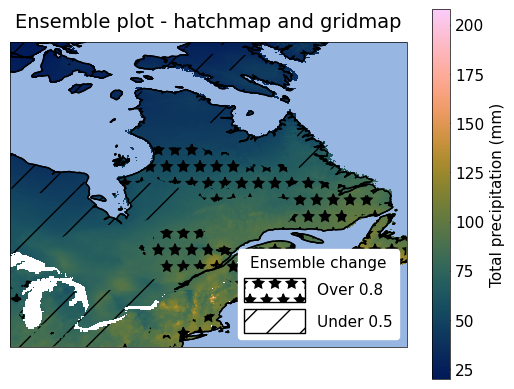

In [ ]:
from xclim import ensembles
urls = ['https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.1/NorESM1-M_rcp85_prcptot_monthly.nc',
        'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.1/MPI-ESM-LR_rcp85_prcptot_monthly.nc',
        'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.1/IPSL-CM5B-LR_rcp85_prcptot_monthly.nc',
        ]
ens = ensembles.create_ensemble(urls)
fut = ens.sel(time=slice("2020", "2050"))
ref = ens.sel(time=slice("1990", "2020"))
delta = fut.mean("time") - ref.mean("time")
chng_f, pos_f = ensembles.change_significance(
    delta, test="threshold", abs_thresh=2
)
sup_8 = chng_f.where(chng_f.prcptot>0.8)
inf_5 = chng_f.where(chng_f.prcptot<0.5)

ens_stats = ensembles.ensemble_mean_std_max_min(ens)

ax = fg.gridmap(ens_stats.prcptot_mean.mean(dim='time', keep_attrs='True'), features = ['coastline','ocean'], frame = True)

fg.hatchmap({'Over 0.8': sup_8, 'Under 0.5': inf_5}, ax=ax,
            plot_kw={'Over 0.8': {'hatches': '*'}},
            features = ['coastline','ocean'], frame = True,
            legend_kw={'title': 'Ensemble change'})
ax.set_title('Ensemble plot - hatchmap and gridmap')

## GeoDataFrame on Maps

The [gdfmap](#gdfmap) function plots geometries contained in a GeoPandas [GeoDataFrame](https://geopandas.org/en/stable/docs/user_guide/data_structures.html#geodataframe) on maps. It is a thin wrap around the [GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) method, with verys similar functionality to `gridmap()` and most of the same features.

To use this function, the data to be linked to the colormap has to be included in the GeoDataFrame. Its name (as a string) must be passed to the `df_col` argument. Like described above, if the `cmap` argument is `None`, the function will look for common variable names in the name of this column, and use an appropriate colormap if a match is found.

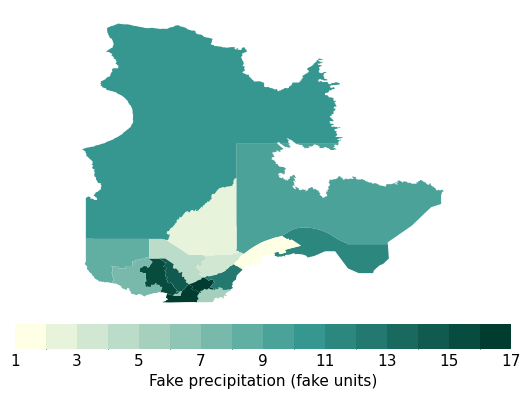

In [13]:
import geopandas as gpd
qc_bound = gpd.read_file("https://pavics.ouranos.ca/geoserver/public/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=public%3Aquebec_admin_boundaries&maxFeatures=50&outputFormat=application%2Fjson")
qc_bound['pr']=qc_bound['RES_CO_REG'].astype(float) # create fake precipitation data

ax = fg.gdfmap(qc_bound,
          'pr',
          levels = 16,
          plot_kw = {'legend_kwds': {'label': 'Fake precipitation (fake units)'}}
                )

Projections can be used like in `gridmap()`, although some of the Cartopy projections might lead to unexpected results due to the interaction between Cartopy and GeoPandas, especially when the whole globe is plotted.

Also note that the colorbar parameters have to be accessed through the `legend_kwds` argument of [GeoDataFrame.plot()](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot).

Text(0.5, 1.0, 'Waterways of Trois-Rivières')

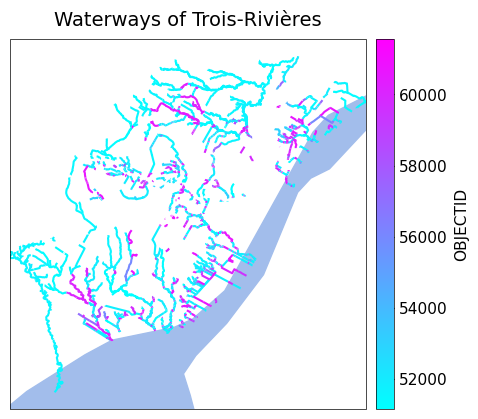

In [14]:
r=gpd.read_file('https://www.donneesquebec.ca/recherche/dataset/11a317d0-97a2-4896-85b5-4cb26ccf5dc6/resource/4c6fe152-8c82-4d36-a8e0-9b584b9cde18/download/cours-eau-v3r.json')
ax = fg.gdfmap(r,
               'OBJECTID',
               cmap = 'cool',
               projection = ccrs.LambertConformal(),
               features = {'ocean': {'color':'#a2bdeb'}},
               plot_kw = {'legend_kwds':{'orientation': 'vertical'}},
               divergent=True,
               frame=True
              )
ax.set_title("Waterways of Trois-Rivières")

## Climate Stripes

Climate stripe diagrams are a way to present the relative change of climate variables or indicators over time, in a simple and aesthetically-oriented manner. Figanos creates such plots through the [stripes()](#stripes) function.

While the vast majority of these diagrams will show the yearly change of a variable relative to a reference point, `stripes()` will adjust the size of the stripes to fill the figure to accomodate datasets with time intervals greater than a year.

The function accepts DataArrays, one-variable Datasets, and a dictionary containing scenarios (DataArrays or Datasets) to be stacked. The plot will be divided in as many sub-axes as there are entries in the dictionary. Normally, these scenarios would contain identical data up to a certain year, where the scenarios diverge; the `divide` argument should be used to create an axis separation at this point of divergence.

<Axes: >

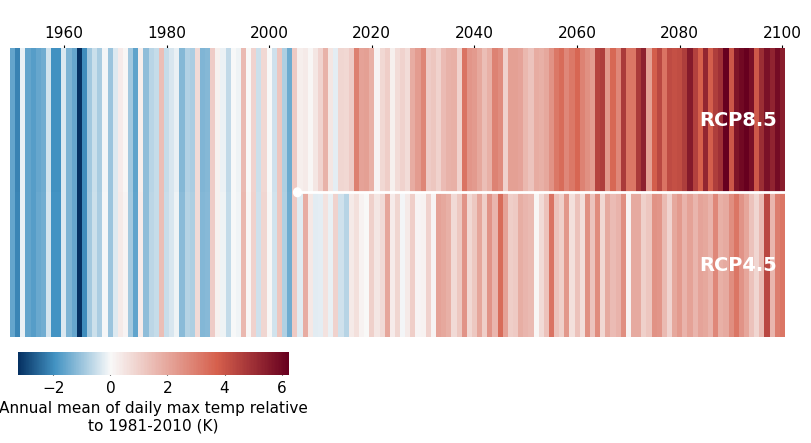

In [27]:
# create two datasets of mean annual temperature relative to the 1981-2010 period
url1 = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.3/MPI-ESM-LR_rcp85_tx_mean_annual.nc'
rcp85 = xr.open_dataset(url1, decode_timedelta=False)
rcp85 = rcp85.sel(lon=-73, lat=46, method='nearest')
rcp85_deltas = rcp85 - rcp85.sel(time=slice("1981","2010")).mean(dim='time')
rcp85_deltas.tx_mean_annual.attrs['long_name'] = 'Mean annual daily max temp relative to 1981-2010'
rcp85_deltas.tx_mean_annual.attrs['units'] = 'K'

url2 = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.3/MPI-ESM-LR_rcp45_tx_mean_annual.nc'
rcp45 = xr.open_dataset(url2, decode_timedelta=False)
rcp45 = rcp45.sel(lon=-73, lat=46, method='nearest')
rcp45_deltas = rcp45 - rcp45.sel(time=slice("1981","2010")).mean(dim='time')
rcp45_deltas.tx_mean_annual.attrs['long_name'] = 'Annual mean of daily max temp relative to 1981-2010'
rcp45_deltas.tx_mean_annual.attrs['units'] = 'K'

# plot
fg.stripes({'rcp45': rcp45_deltas, 'rcp85': rcp85_deltas}, divide=2006)

Like most of the other functions, `stripes()` will attempt to find a colormap that is appropriate for the data variables.

Text(0.5, 1.0, 'Precipitation')

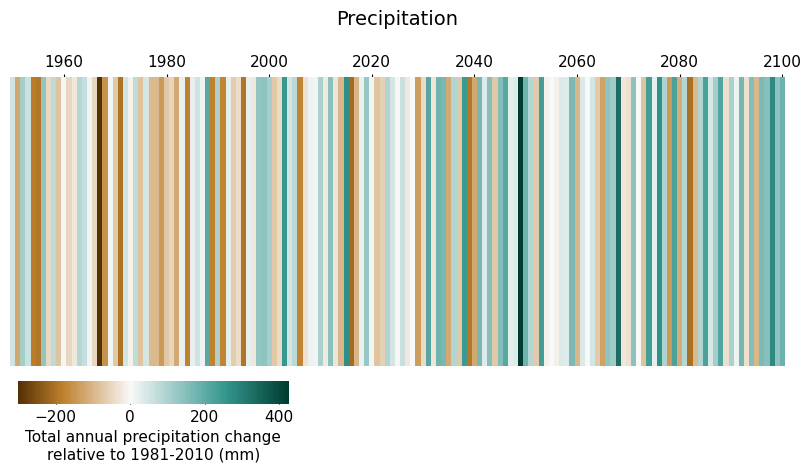

In [28]:
# creating a similar dataset with precipitation data
url3 = 'https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/dodsC/birdhouse/ouranos/portraits-clim-1.3/MPI-ESM-LR_rcp85_precip_accumulation_annual.nc'
prec = xr.open_dataset(url3, decode_timedelta=False)
prec = prec.sel(lon=-73, lat=46, method='nearest')
prec_deltas = prec - prec.sel(time=slice("1981","2010")).mean(dim='time')
prec_deltas.precip_accumulation_annual.attrs['long_name'] = 'Total annual precipitation change relative to 1981-2010'
prec_deltas.precip_accumulation_annual.attrs['units'] = 'mm'

ax = fg.stripes(prec_deltas)
ax.set_title('Precipitation')

## Violin Plots

Violin plots are a practical tool for visualizing the statistical distribution of data in an ensemble, combining a box plot with a kernel density plot. The [violin](#violin) function wraps Seaborn's [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot) function to directly accept xarray objects, and incorporates other figanos features. The `data` argument can be a DataArray (one "violin"), a Dataset (as many "violins" as there are variables in the Dataset), or a dictionary of either types. In the case of a dictionary, its keys will become the "violin" labels.

As with other functions, when `use_attrs` is passed and `data` is a dictionary, attributes from the first dictionary entry will be put on the plot.

<Axes: title={'left': '30 year mean Annual maximum of daily maximum\ntemperature. 50th percentile of ensemble.'}, ylabel='30 year mean Maximum daily\nmaximum temperature (K)'>

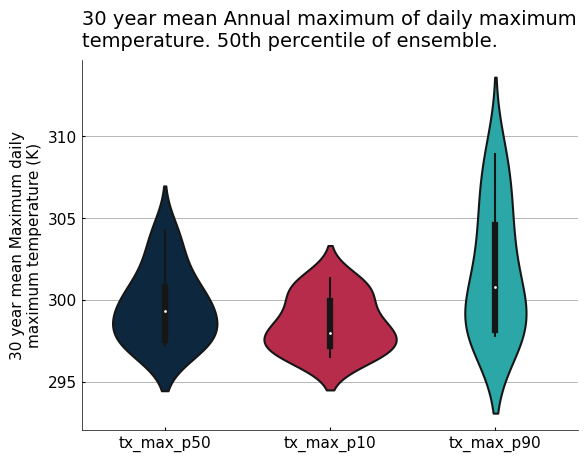

In [29]:
fg.violin(ds_time, use_attrs={'title':'description'})

The optional `color` argument combines the Seaborn function's `color` and `palette` arguments. A single color or a list of colors can be passed. Integers can be passed instead of strings to refer to colors of the currently used stylesheet. If the list of colors is shorter than the number of variables on the plot, the colors are repeated.

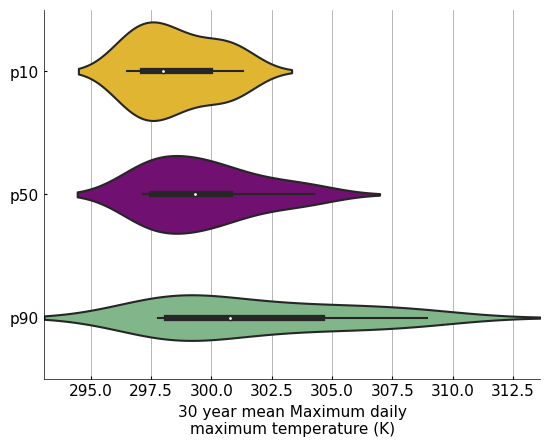

In [30]:
my_data = {'p10': ds_time.tx_max_p10,'p50': ds_time.tx_max_p50, 'p90': ds_time.tx_max_p90}

ax = fg.violin(my_data, plot_kw={'orient':'h'}, color=[3, 'purple', '#78bf84'])

## Heatmaps

Similarly to violin plots, the [heatmap](#heatmap) function wraps Seaborn's [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to directly accept xarray objects, and incorporates other figanos features. The `data` argument can be a DataArray, a Dataset, or a dictionary of either types and of length=1. There is no real benefit to using a dictionary, but it is accepted to be coherent with other functions in the package.

<Axes: xlabel='properties', ylabel='realization'>

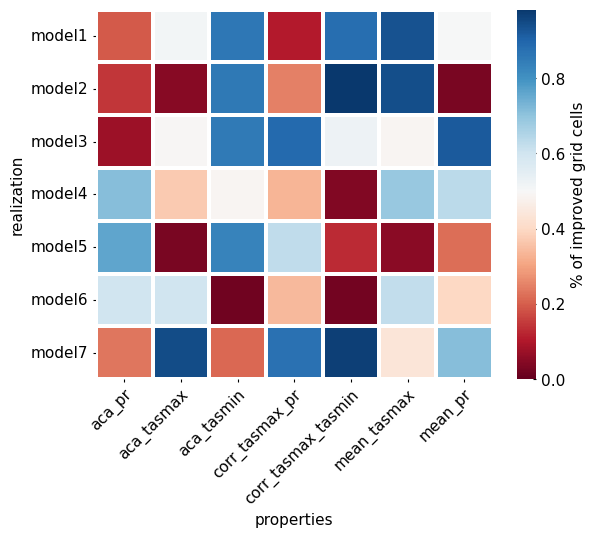

In [31]:
# create diagnostics Dataset from scratch

improvement = np.random.rand(7,7)
diagnostics = xr.DataArray(data=improvement,
                           coords=dict(realization=['model1', 'model2', 'model3', 'model4', 'model5', 'model6', 'model7'],
                                       properties=['aca_pr', 'aca_tasmax', 'aca_tasmin', 'corr_tasmax_pr',
                                                   'corr_tasmax_tasmin', 'mean_tasmax', 'mean_pr']))

diagnostics.attrs['long_name'] = "% of improved grid cells"

# plot heatmap

fg.heatmap(diagnostics, divergent=0.5, plot_kw={'vmin': 0, 'linecolor': 'w', 'linewidth':1.5})


In order to produce realiable results, the xarray object passed to `heatmap()` has to have only two dimensions. Under the hood, the function converts the DataArray containing the data to a pandas DataFrame before plotting it. Using `transpose=True` swaps the x and y axes.

The colorbar kwargs are accessible through the nesting of `cbar_kws` in `plot_kw`.

Text(53.380208333333314, 0.5, '')

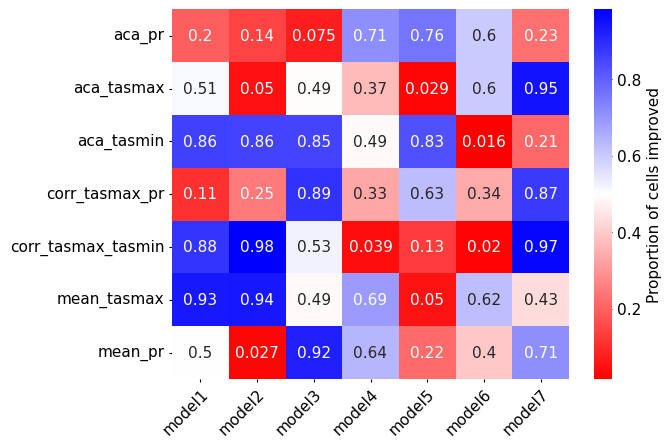

In [32]:
ax = fg.heatmap(diagnostics,
                transpose=True,
                cmap='bwr_r',
                divergent=0.5,
                plot_kw={'cbar_kws':{'label': 'Proportion of cells improved'}, 'annot':True}
               )
ax.set_xlabel("") # get rid of labels
ax.set_ylabel("")

## Taylor Diagrams

Taylor diagrams are a useful way to compare simulation datasets to a reference dataset. They allow to graphically represent the standard deviation of both the simulation and reference datasets, the correlation between both, and the root mean squared error (a function of the two previous statistical properties).

The [taylordiagram](#taylordiagram) function creates each point on the Taylor diagram from an object created using `xclim.sdba.measures.taylordiagram`, as illustrated below.

### Important Notes
* The structure of the matplotlib axes being different than in the other figanos functions, this funcion does not have an `ax` argument, and creates its own figure.
* To change the axis labels, use the `std_label` and `corr_label` arguments, rather than the `ax.set_xlabel()` method.
* Dataset with negative correlations with the reference dataset will not be plotted.
* To modify the appearance of the reference point (on the x-axis), use the keyword 'reference' in `plot_kw`.

/home/jlavoie/Projets/figanos/figanos/matplotlib/plot.py:1626: UserWarning: 10 points with negative correlations will not be plotted: model0, model1, model2, model3, model4, model5, model6, model8, model10, model12
  warnings.warn(


<FloatingAxesHostAxes: >

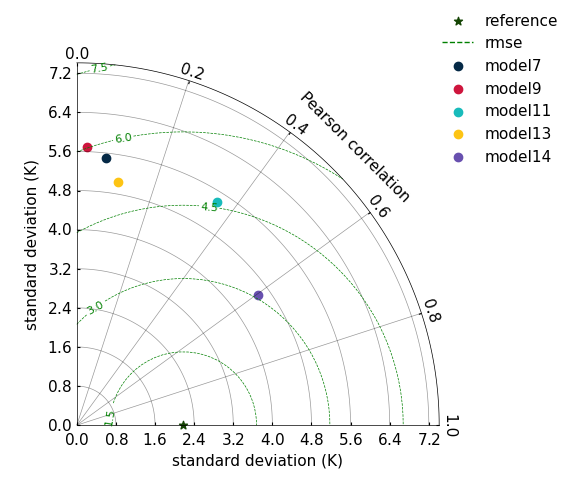

In [33]:
da_ref = ds_time['tx_max_p50']


rands = np.arange(15)
sims = {}
for rand in rands:
    name = "model" + str(rand)
    da = xr.DataArray(data=np.random.rand(13)*20+290+rand,
                      dims={'time': da_ref.time.values})
    da.attrs["units"] = da_ref.units

    sims[name] = sdba.measures.taylordiagram(da, da_ref)

fg.taylordiagram(sims, std_range=(0, 1.3), contours=5, contours_kw={'colors': 'green'}, plot_kw={'reference': {'marker':'*'}})
